In [1]:
pip install citipy

  Using cached https://files.pythonhosted.org/packages/3b/d0/59721d0f3954781488aac17ee4a40412d0a3547e98bb16377a09c39a2807/citipy-0.0.5.tar.gz
  Using cached https://files.pythonhosted.org/packages/00/3d/bd727d025b1706798aae14da3f69fc7d5a8639dc9e0eba37c7dcd43eb03e/kdtree-0.16-py2.py3-none-any.whl
  Running setup.py install for citipy: started
    Running setup.py install for citipy: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
import json
import scipy.stats as st

#import api key from configs.py file
from configs import api_key

#city data based on lat. and long.
from citipy import citipy

#output file (csv)
output_data_file = "output_data/cities.csv"

#Range of latitudes and logitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#np.random.seed(1)
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

In [76]:
#set up dataframe and create empty columns for the data to be entered into
cities_df = pd.DataFrame({"City": cities})
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""

#base url ready for the city name to be added to the end
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q='

#starting data retrieval
print("Beginning Data Retrieval")
print("-----------------------------")
#go through cities_df by city name and start entering in the info from the API
for index, row in cities_df.iterrows():
    #get city from df 
    city_name = row["City"]
    #assemble url and make api call
    response = requests.get(base_url + city_name).json()
    
    #try to fill in the df, else print skipping
    try:
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        print(f'Processing record {index} | {city_name}')
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        #delete that row from df
        cities_df = cities_df.drop([index])

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

#convert Max temp from Kelvin to Fahrenheit and Wind Speed from m/s to mph
cities_df["Max Temp"] = cities_df["Max Temp"] * 1.8 - 459.67
cities_df["Wind Speed"] = cities_df["Wind Speed"] / 0.44704

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing record 1 | atuona
Processing record 2 | dikson
Processing record 3 | tasiilaq
Processing record 4 | airai
Processing record 5 | roma
Processing record 6 | cherskiy
City not found. Skipping...
Processing record 8 | east london
City not found. Skipping...
Processing record 10 | gat
Processing record 11 | yeppoon
Processing record 12 | port lincoln
Processing record 13 | bangangte
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing record 17 | ponta do sol
Processing record 18 | codrington
Processing record 19 | dunedin
Processing record 20 | thompson
Processing record 21 | ames
Processing record 22 | arrifes
Processing record 23 | jamestown
Processing record 24 | butaritari
Processing record 25 | bemidji
Processing record 26 | busselton
Processing record 27 | agadez
Processing record 28 | farah
Processing record 29 | broken hill
City not found. Skipping

City not found. Skipping...
Processing record 254 | robe
City not found. Skipping...
Processing record 256 | solnechnyy
Processing record 257 | juba
City not found. Skipping...
Processing record 259 | mildura
Processing record 260 | kavieng
Processing record 261 | kindersley
Processing record 262 | ozernovskiy
Processing record 263 | port macquarie
Processing record 264 | sinegorye
Processing record 265 | tommot
City not found. Skipping...
Processing record 267 | kabala
Processing record 268 | daru
Processing record 269 | sorland
Processing record 270 | auki
Processing record 271 | pilar
Processing record 272 | fort pierce
Processing record 273 | kerman
Processing record 274 | khasan
Processing record 275 | angoche
Processing record 276 | vestmannaeyjar
Processing record 277 | klaksvik
Processing record 278 | santa cruz de la palma
Processing record 279 | acapulco
City not found. Skipping...
Processing record 281 | zhezkazgan
Processing record 282 | kalmunai
Processing record 283 | gal

Processing record 503 | coquimbo
Processing record 504 | matata
Processing record 505 | villena
Processing record 506 | timmendorfer strand
Processing record 507 | acajutla
Processing record 508 | ilheus
Processing record 509 | colares
Processing record 510 | lasa
Processing record 511 | alindao
Processing record 512 | praia
Processing record 513 | gazojak
Processing record 514 | letka
City not found. Skipping...
Processing record 516 | havoysund
Processing record 517 | kaberamaido
Processing record 518 | trelew
City not found. Skipping...
Processing record 520 | challapata
Processing record 521 | raga
Processing record 522 | san cristobal
Processing record 523 | teahupoo
Processing record 524 | goderich
Processing record 525 | chhatak
Processing record 526 | montepuez
Processing record 527 | pangody
Processing record 528 | tha bo
Processing record 529 | havre-saint-pierre
Processing record 530 | brigantine
Processing record 531 | xiaoweizhai
Processing record 532 | yorosso
Processing 

In [77]:
#export data to csv
cities_df.to_csv('../output_data/cities_df.csv')

#display number of values for each column in df
cities_df.astype(bool).sum(axis = 0)

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    430
Wind Speed    549
Country       549
Date          549
dtype: int64

In [78]:
#display the dataframe
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,atuona,-9.8,-139.03,80.042,80,35,16.9336,PF,1592852308
2,dikson,73.51,80.55,44.096,87,100,9.46224,RU,1592852308
3,tasiilaq,65.61,-37.64,55.4,58,40,8.05297,GL,1592851945
4,airai,-8.93,125.41,56.102,100,51,3.71331,TL,1592851945
5,roma,43.21,-75.46,91.004,43,40,8.05297,US,1592851922


In [155]:
#inspect df and determine number of cities with over 100% humidity 
low_humidity_df = cities_df[cities_df.Humidity <= 100]
print(f'The number of cities with over 100% humidity is {len(cities_df) - len(low_humidity_df)}.')

The number of cities with over 100% humidity is 0.


In [156]:
#  Get the indices of cities that have humidity over 100%.
over_100_indexes = cities_df[cities_df.Humidity > 100].index
over_100_indexes

Int64Index([], dtype='int64')

In [81]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data= cities_df
for x in equals_100_indexes:
    clean_city_data = cities_df.drop([x])

clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,atuona,-9.8,-139.03,80.042,80,35,16.9336,PF,1592852308
2,dikson,73.51,80.55,44.096,87,100,9.46224,RU,1592852308
3,tasiilaq,65.61,-37.64,55.4,58,40,8.05297,GL,1592851945
4,airai,-8.93,125.41,56.102,100,51,3.71331,TL,1592851945
5,roma,43.21,-75.46,91.004,43,40,8.05297,US,1592851922


In [82]:
# Extract relevant fields from the data frame
lat = clean_city_data.Lat
max_temp = clean_city_data["Max Temp"]
humid = clean_city_data.Humidity
cloud = clean_city_data.Cloudiness
wind = clean_city_data['Wind Speed']

# Export the City_Data into a csv
clean_city_data.to_csv('../output_data/clean_city_data.csv')

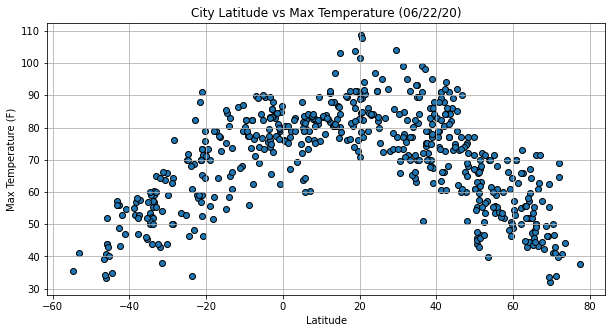

In [83]:
#Latitude vs Temperature Plot
#save today's date in the today variable
today = pd.to_datetime('today').strftime("%m/%d/%y")
fig = plt.figure(figsize = (10,5))
#calling scatter plot
plt.scatter(lat, max_temp, edgecolors = "black")
plt.title(f'City Latitude vs Max Temperature ({today})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
#saving figure in the output_data directory
fig.savefig('../output_data/lat_vs_temp.png')
plt.show()

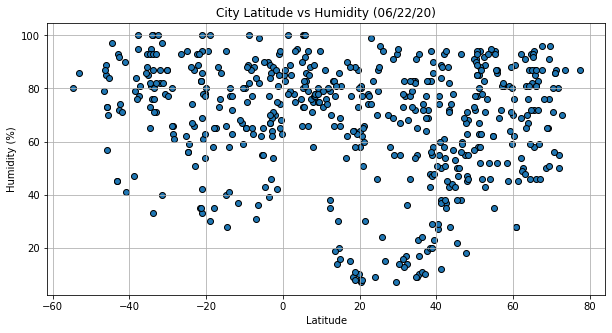

In [84]:
#Latitude vs Humidity Plot
fig = plt.figure(figsize = (10,5))
#call scatter plot
plt.scatter(lat, humid, edgecolors = "black")
plt.title(f'City Latitude vs Humidity ({today})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
#saving figure to the output_data directory
fig.savefig('../output_data/lat_vs_humid.png')
plt.show()

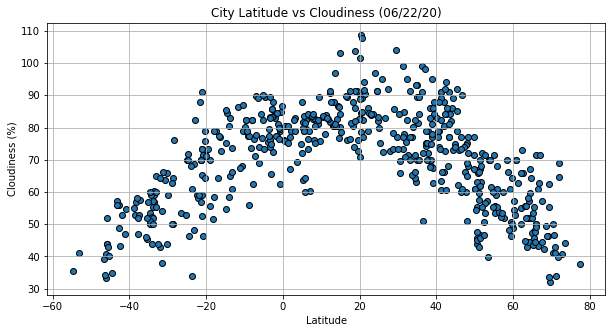

In [85]:
#Latitude vs Cloudiness Plot
fig = plt.figure(figsize = (10,5))
#calling scatter plot
plt.scatter(lat, max_temp, edgecolors = "black")
plt.title(f'City Latitude vs Cloudiness ({today})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
#saving file to the output_data directory
fig.savefig('../output_data/lat_vs_cloudiness.png')
plt.show()

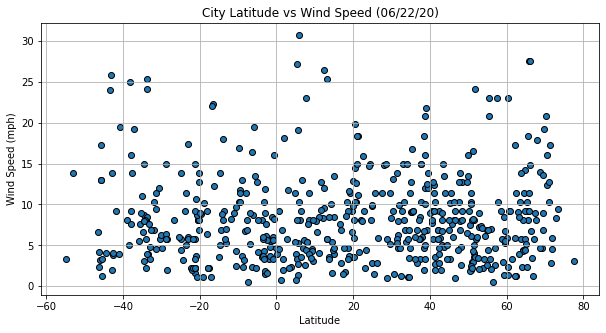

In [86]:
#Latitude vs Wind Speed Plot
fig = plt.figure(figsize = (10,5))
#calling scatter plot
plt.scatter(lat, wind, edgecolors = "black")
plt.title(f'City Latitude vs Wind Speed ({today})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
#saving plot to the output_data directory
fig.savefig('../output_data/lat_vs_wind_speed.png')
plt.show()

In [139]:
# OPTIONAL: Create a function to create Linear Regression plots
#returns regress_values, the line equation of best fit, and the r correlation
def lin_regress(list_x, list_y):
    slope, int, r, p, st_err = st.linregress(list_x, list_y)
    regress_values = slope*list_x + int
    line_eq = f'y = {round(slope, 2)}x + {round(int,2)}'
    return regress_values, line_eq, r

In [135]:
# Create Northern and Southern Hemisphere DataFrames

north_hem = clean_city_data[clean_city_data["Lat"] > 0]
south_hem = clean_city_data[clean_city_data["Lat"] < 0]

# Northern Hemisphere Plots

In [136]:
#Preparing data for all the northern hemisphere plots
lat = north_hem.Lat.astype(float)
max_temp = north_hem["Max Temp"].astype(float)
humid = north_hem.Humidity.astype(float)
cloud = north_hem.Cloudiness.astype(float)
wind = north_hem['Wind Speed'].astype(float)

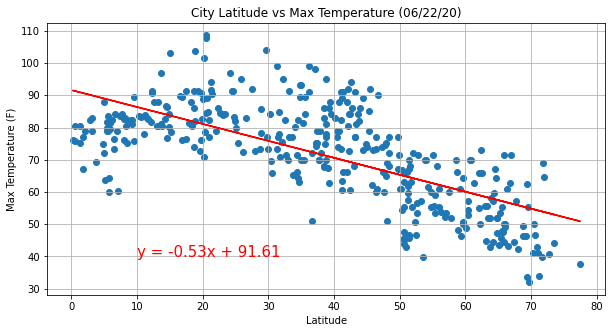

The r-squared is: 0.4782528281245408


In [154]:
#Northern Hemisphere - Latitude vs Max Temp Linear Regression
#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, max_temp)

fig = plt.figure(figsize = (10,5))
#calling the scatter plot
plt.scatter(lat, max_temp)
plt.title(f'City Latitude vs Max Temperature ({today})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (10,40), fontsize = 15, color = "red" )
#saves the file to the output_data directory
fig.savefig('../output_data/north_lat_vs_temp.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

# Southern Hemisphere Plots